In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def frozen(size,hole):
    grid=[]
    for i in range(size):
        grid.append(['F']*size)
    grid[0][0]="S"
    grid[size-1][size-1]='G'
    x=np.random.randint(1,size*size-2,hole)
    for i in x:
        row=i//size
        col=i%size
        grid[row][col]='H'
    return pd.DataFrame(grid)

In [3]:
def find_reward(pos):
    dis={'G':100,'H':-100,'F':0,'S':0}
    c=grid.loc[pos//size,pos%size]
    return dis[c]
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [4]:
def next_state(pos,action):
    row=pos//size
    col=pos%size
    if(action==0):
        col=col-1
    elif(action==1):
        col=col+1
    elif(action==2):
        row=row-1
    elif(action==3):
        row=row+1
    return row*size+col

In [5]:
def check_possible(pos,action):
    row=pos//size
    col=pos%size
    if(action==0 and col==0):
        return 0;
    elif(action==1 and col==size-1):
        return 0;
    elif(action==2 and row==0):
        return 0;
    elif(action==3 and row==size-1):
        return 0;
    else:
        return 1

In [6]:
# Q(s,a)=(1-alpha)*Q(s,a)+alpha*(r+disc*max a' Q(s',a'))
# 0->left
# 1-> right
# 2-> up
# 3-> down

In [7]:
def dg(grid,Q,alpha=0.5,disc=0.9,episodes=200):
    rec=[]
    epsilon=1
    for i in range(episodes):
        state=0
        totalreward=0
        while(1):
            if(grid.loc[state//size,state%size]=='G'):
                break
            if np.random.random()>=epsilon:
    #             prob = np.exp(Q[state])
    #             prob = prob/np.sum(prob)
    #             action=np.random.choice([0,1,2,3], p = prob)
                action=np.argmax(Q[state])
            else:
                action=np.random.randint(0,4)
            if(check_possible(state,action)==0):
                continue;
            else:
                newstate=next_state(state,action)
                reward=find_reward(newstate)
                totalreward+=reward
                Q[state,action]=(1-alpha)*Q[state,action]+alpha*(reward+disc*np.max(Q[newstate]))
                state=newstate
        epsilon = 0.9*np.exp(-0.01*i)+0.02
        rec.append(totalreward)
    return rec   

#### Training on grid

In [8]:
size=8
hole=10
grid=frozen(size,hole)
Q=np.zeros((size*size,4))
r=dg(grid,Q)
conv={0:'left',1:'right',2:'up',3:'down'}
state=0
path='start'+'->'
while(grid.loc[state//size,state%size]!='G'):
    action=np.argmax(Q[state])
    path+=(conv[action])+'->'
    state=next_state(state,action)
path=path+'goal'
grid

,0,1,2,3,4,5,6,7
0,S,H,F,F,F,F,F,F
1,F,F,F,F,F,H,F,F
2,F,F,H,F,F,H,F,F
3,H,F,F,F,F,H,F,F
4,F,F,F,F,F,F,H,F
5,F,F,H,F,F,F,F,F
6,H,F,F,F,F,F,F,H
7,F,F,F,F,F,F,F,G


#### Path taken after learning 

In [9]:
path

'start->down->right->down->down->down->right->right->right->down->down->down->right->right->right->goal'







## 1) Graph  showing episodes vs total reward

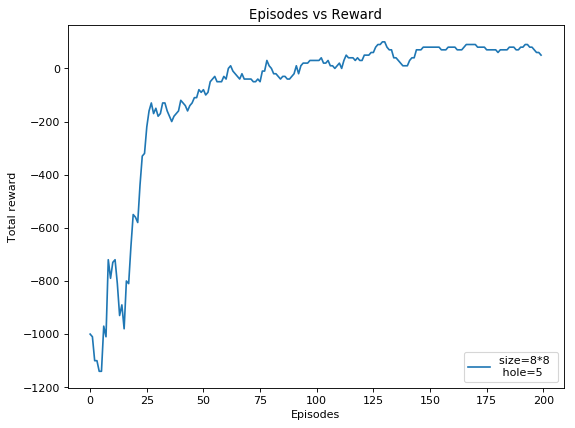

In [10]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
size=8
hole=5
grid=frozen(size,hole)
Q=np.zeros((size*size,4))
r=dg(grid,Q)
plt.plot([i for i in range(200)],smooth(r,10))
plt.title("Episodes vs Reward")
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend(['size=8*8 \n hole=5'],loc=4)
plt.savefig('1.png', bbox_inches='tight')
plt.show()

## 2) Graph  showing influence of value of discount 

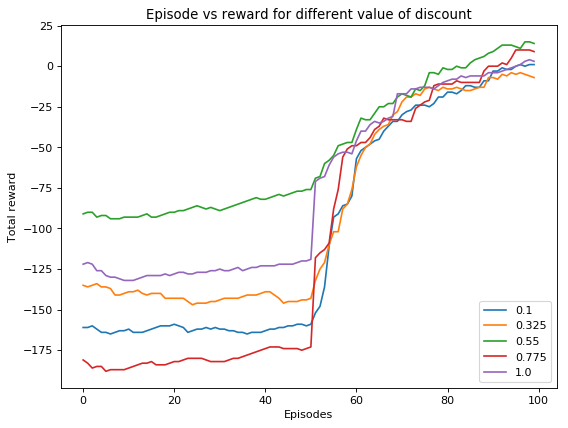

In [11]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
size=6
hole=5
grid=frozen(size,hole)
Q=np.zeros((size*size,4))
disc=np.linspace(0.1,1,5)
for i in disc:
    r=dg(grid,Q,disc=i,episodes=100)
    plt.plot([i for i in range(100)],smooth(r,100))
plt.title('Episode vs reward for different value of discount')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend(disc,loc=4)
plt.savefig('2.png', bbox_inches='tight')
plt.show()

 ## 3) Graph  showing influence of value of alpha

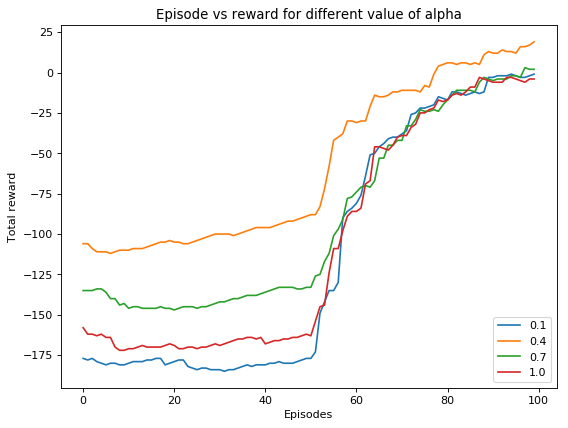

In [12]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
size=6
hole=5
grid=frozen(size,hole)
Q=np.zeros((size*size,4))
alpha=np.linspace(0.1,1,4)
for i in alpha:
    r=dg(grid,Q,alpha=i,episodes=100)
    plt.plot([i for i in range(100)],smooth(r,100))
plt.title('Episode vs reward for different value of alpha')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend(alpha,loc=4)
plt.savefig('3.png', bbox_inches='tight')
plt.show()

## 4) Effect of size on learning performance

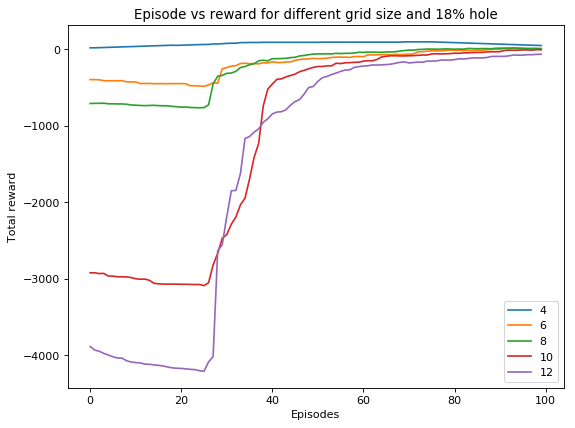

In [13]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
s=[4,6,8,10,12]
for i in s:
    size=i
    hole=i*i*18//100
    grid=frozen(size,hole)
#     print(grid)
    Q=np.zeros((size*size,4))
    r=dg(grid,Q,episodes=100)
#     print(i,r)
    plt.plot([j for j in range(100)],smooth(r,50))
plt.title('Episode vs reward for different grid size and 18% hole')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend(s,loc=4)
plt.savefig('4.png', bbox_inches='tight')
plt.show()

## 5) Effect of no. of hole on learning perfomance

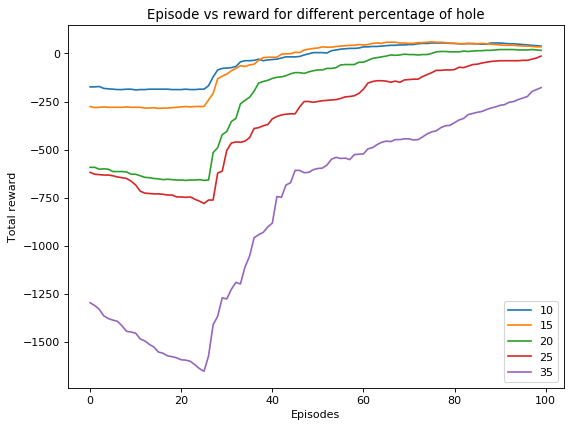

In [14]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
h=np.array([10,15,20,25,35])
for i in h:
    size=6
    hole=size*size*i//100
    grid=frozen(size,hole)
    Q=np.zeros((size*size,4))
    r=dg(grid,Q,episodes=100)
    plt.plot([j for j in range(100)],smooth(r,50))
plt.title('Episode vs reward for different percentage of hole')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend(h,loc=4)
plt.savefig('5.png', bbox_inches='tight')
plt.show()

#### ----------------------------------------------------------end---------------------------------------------------------------------------------------------------------